# Self-Driving Car Engineer Nanodegree

## Deep Learning


# Project Write Up

### Data Set Summary & Exploration

Image sizes : 32 x 32 with 3 channels

Number of training examples = 34799

Number of testing examples = 12630

Number of validation examples = 4410

Image data shape = (32, 32, 3)

Number of classes = 43

### Visual Exploration

All bar graphs for the three separate sets have similar distribution of classes.

### Designing the Conv net model

I decided to refer to tensorflow examples and build a network with:
1. Convolutional Layer (with ReLU activation) - with 7x7 filter & 32 channels with strides of 3 steps.
2. Max Pooling after Convolutional Layer
3. Map the Max Pooled Output to fully connected layer 1 with 512 nodes (with ReLU activation and dropout)
4. Add another fully connected layer 2 with 128 nodes (with ReLU activation and dropout)
5. Map the last fully connected layer to labels (classifications)


The model is fed the normalized data where every pixel's channel value is normalized by the formula - (pixel - 128)/128

## Describe how you trained your model. The discussion can include the type of optimizer, the batch size, number of epochs and any hyperparameters such as learning rate.

I used an Adam Optimizer and a cost function softmax cross entropy with logits.

I tried various epochs and filters but 400 epochs with the filter of 7x7 with 32 depth gave me the best classification accuracy of 79.4% for TEST dataset. The learning rate of 0.005 gave the best result.


## Testing on 5 new images

I downloaded 5 images from google search and manually cropped to generate 32x32 images for testing.

The result was that the model was able to classify 60% of the images correctly.

---
## Step 0: Load The Data

In [104]:
# Load pickled data
import pickle

# DONE: Fill this in based on where you saved the training and testing data

training_file = "traffic-sign-data/train.p"
validation_file= "traffic-sign-data/valid.p"
testing_file = "traffic-sign-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results


# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [5]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

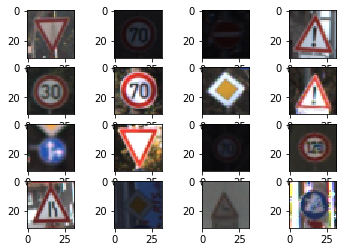

In [6]:
# 16 images
for i in range(4*4):
    plt.subplot(4,4,i+1)
    plt.imshow(X_train[random.randint(0,len(X_train))])

[]

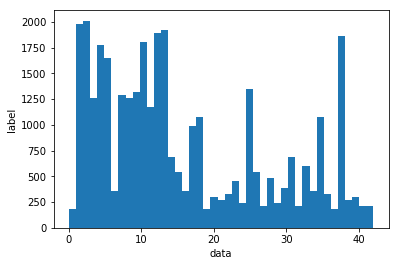

In [7]:
# Histograms of TRAINING LABELS
plt.hist(y_train, bins=n_classes)
plt.xlabel('data')
plt.ylabel('label')
plt.plot()

[]

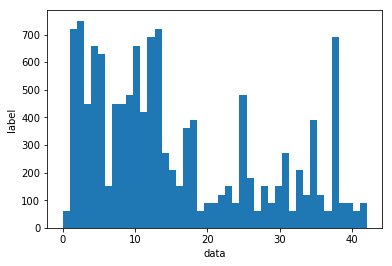

In [8]:
# Histograms of TEST LABELS
plt.hist(y_test, bins=n_classes)
plt.xlabel('data')
plt.ylabel('label')
plt.plot()

[]

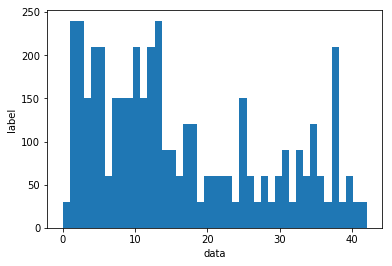

In [9]:
# Histograms of VALIDATION LABELS
plt.hist(y_valid, bins=n_classes)
plt.xlabel('data')
plt.ylabel('label')
plt.plot()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [10]:
import numpy as np
import tensorflow as tf
import time
import matplotlib.image as mpimg
import os

In [ ]:
### TODO - DO DO

In [105]:
X_train_original = X_train
X_test_original = X_test
X_valid_original = X_valid

In [13]:
# Shuffle training examples
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=42)

In [73]:
def normalize_image(image):
    print("processing image....")
    #print(image[0][0])
    placeholder = np.zeros((32,32,3))
    for i in range(len(image)):
        for j in range(len(image[i])):
            for z in range(len(image[i][j])):
                #print(image[i][j], "  == ", " Current pixel" , i , " - " , j, " === ", (image[i][j][z] - 128) / 128)
                placeholder[i][j][z] = (image[i][j][z] - 128) / 128
                #print(placeholder[i][j][z])
    return placeholder
    

In [90]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed
### Image is of size [32,32,3]

# Normalise input (images still in colour)
# Normalize: X_train, X_test, X_valid
X_train_sub = np.zeros((len(X_train),32,32,3))
for i in range(len(X_train)):
    X_train_sub[i] = normalize_image(X_train_original[i])

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

In [95]:
## Save normalized images in a folder
np.save("normalized_images/X_train_sub", X_train_sub)
np.save("normalized_images/y_train", y_train)

In [128]:
X_test_sub = np.zeros((len(X_test_original),32,32,3))
for i in range(len(X_test)):
    X_test_sub[i] = normalize_image(X_test_original[i])

X_valid_sub = np.zeros((len(X_valid_original),32,32,3))
for i in range(len(X_valid_original)):
    X_valid_sub[i] = normalize_image(X_valid_original[i])


processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing image....
processing im

In [129]:
## Save normalized images in a folder
np.save("normalized_images/X_test_sub", X_test_sub)
np.save("normalized_images/y_test", y_test)

np.save("normalized_images/X_valid_sub", X_valid_sub)
np.save("normalized_images/y_valid", y_valid)

In [117]:
def plot_norm_image(image_index):
    """Plots original image on the left and normalised image on the right."""
    plt.subplot(2,2,1)
    plt.imshow(X_test_original[image_index])
    plt.subplot(2,2,2)
    plt.imshow(X_test_sub[image_index])
    print(X_test_original[image_index][1][1][1])
    print(X_test_sub[image_index][1][1][1])

57
-0.5546875


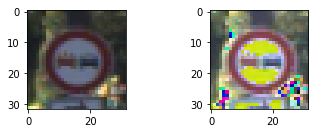

In [119]:
plot_norm_image(2890)

In [107]:
print(X_test_original[0])

[[[116 139 174]
  [116 137 171]
  [118 138 172]
  ..., 
  [ 98 114 143]
  [ 97 121 147]
  [ 85 105 130]]

 [[115 142 176]
  [115 140 174]
  [117 141 175]
  ..., 
  [119 143 176]
  [120 141 173]
  [120 139 171]]

 [[117 141 174]
  [117 142 175]
  [114 140 172]
  ..., 
  [120 144 179]
  [122 144 179]
  [120 143 177]]

 ..., 
 [[117 137 167]
  [115 134 164]
  [117 135 164]
  ..., 
  [115 137 169]
  [116 136 168]
  [118 139 172]]

 [[116 136 166]
  [114 134 168]
  [113 131 166]
  ..., 
  [113 135 167]
  [117 136 165]
  [115 139 167]]

 [[112 135 167]
  [110 134 165]
  [119 135 165]
  ..., 
  [115 138 167]
  [117 138 167]
  [114 140 170]]]


### Model Architecture

In [ ]:
### Define your architecture here.
# 1. Define conv_net model 
# 2. Define parameters
# 3. Train and Predict the model


In [120]:
def maxpool2d(x, k=2, padding_setting='SAME'):
    """MaxPool2D wrapper."""
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],
                          padding=padding_setting)

def conv2d(x, W, b, strides=3):
    """Conv2D wrapper, with bias and relu activation"""
    # strides = [batch, in_height, in_width, channels]
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

def conv_net(model_x, model_weights, model_biases, model_pool_size, 
             model_dropout_conv, model_dropout_fc, padding='SAME'):
    """Convolutional neural network model."""
    # Convolution Layer 1
    conv1 = conv2d(model_x, model_weights['conv1'], model_biases['conv1'])
    # Max Pooling (down-sampling)
    conv1 = maxpool2d(conv1, k=model_pool_size, padding_setting=padding)
    conv1 = tf.nn.dropout(conv1, model_dropout_conv)

    # Fully connected layer 1
    # Reshape conv1 output to fit fully connected layer input
    conv1_shape = conv1.get_shape().as_list()
    fc1 = tf.reshape(conv1, [-1, conv1_shape[1]*conv1_shape[2]*conv1_shape[3]])
    fc1 = tf.add(tf.matmul(fc1, model_weights['fc1']), model_biases['fc1'])
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, model_dropout_fc)
    # Fully connected layer 2
    fc2 = tf.add(tf.matmul(fc1, model_weights['fc2']), model_biases['fc2'])
    fc2 = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, model_dropout_fc)
    # Output layer
    output = tf.add(tf.matmul(fc2, model_weights['out']), model_biases['out'])
    # Note: Softmax is outside the model
    return output


In [154]:
####
# Parameters for model
####

# Number of inputs
n_input = 32 * 32 * 3
nb_filters = 32


#Shape of input 
input_shape = (32, 32, 3)

#Size of CV Kernel
kernel_size = (7, 7)
#Size of first fully connected layer
n_fc1 = 512
#Size of second fully connected layer
n_fc2 = 128

#Number of channels - RGB
in_channels = 3

#Max pool 2x2
pool_size = 2

#Dropouts for conv & fc
dropout_conv = 0.9
dropout_fc = 0.9

weights_stddev = 0.1
weights_mean = 0.0
biases_mean = 0.0

padding = 'VALID'
if padding == 'SAME':
    conv_output_length = 6
elif padding == 'VALID':
    conv_output_length = 5
else:
    raiseException("Unknown padding.")
def weight_variable(shape, weight_mean, weight_stddev):
    initial = tf.truncated_normal(shape, stddev=weight_stddev, mean=weight_mean)
    # alt: tf.random_normal(shape)
    return tf.Variable(initial)


def bias_variable(shape, bias_mean):
    initial = tf.constant(bias_mean, shape=shape)
    return tf.Variable(initial)


weights = {
    'conv1': weight_variable([kernel_size[0], kernel_size[1], in_channels, nb_filters], 
                             weights_mean, 
                             weights_stddev),
    'fc1': weight_variable([nb_filters * conv_output_length**2, n_fc1], weights_mean, weights_stddev),
    'fc2': weight_variable([n_fc1, n_fc2], weights_mean, weights_stddev),
    'out': weight_variable([n_fc2, n_classes], weights_mean, weights_stddev)
}

biases = {
    'conv1': bias_variable([nb_filters], biases_mean),
    'fc1': bias_variable([n_fc1], biases_mean),
    'fc2': bias_variable([n_fc2], biases_mean),
    'out': bias_variable([n_classes], biases_mean)
}

### Train, Validate and Test the Model

In [200]:
x_unflattened = tf.placeholder("float", [None, 32, 32, 3])
x = x_unflattened

y_rawlabels = tf.placeholder("int32", [None])
y = tf.one_hot(y_rawlabels, depth=43, on_value=1., off_value=0., axis=-1)

# Training parameters
#learning_rate = 0.005
#initial_learning_rate = learning_rate
#training_epochs = 150
#batch_size = 3000
#display_step = 1
#n_train = len(X_train_sub)


learning_rate = 0.005
initial_learning_rate = learning_rate
training_epochs = 400
batch_size = 4000
display_step = 1
n_train = len(X_train_sub)



anneal_mod_frequency = 15
# Annealing rate of 1: learning rate remains constant.
annealing_rate = 1

print_accuracy_mod_frequency = 1

# Construct model
pred = conv_net(x, weights, biases, pool_size, dropout_conv, dropout_fc, padding=padding)
pred_probs = tf.nn.softmax(pred)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Function to initialise the variables
init = tf.initialize_all_variables()

### RUN MODEL ###
# Launch the graph
sess = tf.Session()

# Initialise variables
sess.run(init)

# Initialise time logs
init_time = time.time()
epoch_time = init_time

five_epoch_moving_average = 0.
epoch_accuracies = []

# Training cycle
for epoch in range(training_epochs):
    if five_epoch_moving_average > 0.96:
        break
        
    avg_cost = 0.

    total_batch = int(n_train / batch_size)
    print("Total batch size for epoch #", epoch, " is ", total_batch)
    # Loop over all batches
    for i in range(total_batch):
        #print("batch number #", i)
        batch_x, batch_y = np.array(X_train_sub[i * batch_size:(i + 1) * batch_size]), \
                           np.array(y_train[i * batch_size:(i + 1) * batch_size])
        # tf.train.batch([X_train_sub, y_train], batch_size=100, enqueue_many=True)
        # Run optimization op (backprop) and cost op (to get loss value)
        _, c = sess.run([optimizer, cost], feed_dict={x_unflattened: batch_x, y_rawlabels: batch_y})
        # Compute average loss
        avg_cost += c / total_batch
        # print(avg_cost)
    # Display logs per epoch step
    if epoch % display_step == 0:
        print("Epoch:", '%04d' % (epoch + 1), "cost=",
              "{:.9f}".format(avg_cost))
        last_epoch_time = epoch_time
        epoch_time = time.time()
        # print("Time since last epoch: ", epoch_time - last_epoch_time)
    # Anneal learning rate
    if (epoch + 1) % anneal_mod_frequency == 0:
        learning_rate *= annealing_rate
        print("New learning rate: ", learning_rate)

    if (epoch + 1) % print_accuracy_mod_frequency == 0:
        correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        # Line below needed only when not using `with tf.Session() as sess`
        with sess.as_default():
            epoch_accuracy = accuracy.eval({x_unflattened: X_valid_sub, y_rawlabels: y_valid})
            # TODO: optimise five_epoch_moving_average, e.g. using a queue            
            epoch_accuracies.append(epoch_accuracy)
            if epoch >= 4:
                five_epoch_moving_average = np.sum(epoch_accuracies[epoch-5:epoch]) / 5
                print("Five epoch moving average: ", five_epoch_moving_average)
            print("Accuracy (validation):", epoch_accuracy)

print("Optimization Finished!")

# Test model
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
# Calculate accuracy
# accuracy_train = tf.reduce_mean(tf.cast(correct_prediction, "float"))
# print("Accuracy (train):", accuracy_train.eval({x_unflattened: X_train_sub, y_rawlabels: y_train}))
train_predict_time = time.time()
# print("Time to calculate accuracy on training set: ", train_predict_time - epoch_time)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
# Line below needed only when not using `with tf.Session() as sess`
with sess.as_default():
    print("Accuracy (test):", accuracy.eval({x_unflattened: X_test_sub, y_rawlabels: y_test}))
test_predict_time = time.time()


Instructions for updating:
Use `tf.global_variables_initializer` instead.
Total batch size for epoch # 0  is  8
Epoch: 0001 cost= 5.452210426
Accuracy (validation): 0.0442177
Total batch size for epoch # 1  is  8
Epoch: 0002 cost= 3.777762800
Accuracy (validation): 0.053288
Total batch size for epoch # 2  is  8
Epoch: 0003 cost= 3.673183948
Accuracy (validation): 0.0548753
Total batch size for epoch # 3  is  8
Epoch: 0004 cost= 3.619432300
Accuracy (validation): 0.0569161
Total batch size for epoch # 4  is  8
Epoch: 0005 cost= 3.568723708
Five epoch moving average:  0.0
Accuracy (validation): 0.0580499
Total batch size for epoch # 5  is  8
Epoch: 0006 cost= 3.527722865
Five epoch moving average:  0.053469389677
Accuracy (validation): 0.0768707
Total batch size for epoch # 6  is  8
Epoch: 0007 cost= 3.487598866
Five epoch moving average:  0.0600000023842
Accuracy (validation): 0.0857143
Total batch size for epoch # 7  is  8
Epoch: 0008 cost= 3.454176188
Five epoch moving average:  0.066

Epoch: 0057 cost= 0.941955730
Five epoch moving average:  0.537505674362
Accuracy (validation): 0.539909
Total batch size for epoch # 57  is  8
Epoch: 0058 cost= 0.884574953
Five epoch moving average:  0.537777805328
Accuracy (validation): 0.571429
Total batch size for epoch # 58  is  8
Epoch: 0059 cost= 0.816552956
Five epoch moving average:  0.542811822891
Accuracy (validation): 0.581633
Total batch size for epoch # 59  is  8
Epoch: 0060 cost= 0.793600515
New learning rate:  0.005
Five epoch moving average:  0.551791381836
Accuracy (validation): 0.590476
Total batch size for epoch # 60  is  8
Epoch: 0061 cost= 0.781549074
Five epoch moving average:  0.563129281998
Accuracy (validation): 0.577098
Total batch size for epoch # 61  is  8
Epoch: 0062 cost= 0.755622502
Five epoch moving average:  0.572108840942
Accuracy (validation): 0.585941
Total batch size for epoch # 62  is  8
Epoch: 0063 cost= 0.750515368
Five epoch moving average:  0.58131518364
Accuracy (validation): 0.598413
Total 

Five epoch moving average:  0.721814060211
Accuracy (validation): 0.714286
Total batch size for epoch # 113  is  8
Epoch: 0114 cost= 0.184317686
Five epoch moving average:  0.724172306061
Accuracy (validation): 0.727211
Total batch size for epoch # 114  is  8
Epoch: 0115 cost= 0.269156147
Five epoch moving average:  0.72643995285
Accuracy (validation): 0.704762
Total batch size for epoch # 115  is  8
Epoch: 0116 cost= 0.196653847
Five epoch moving average:  0.721451282501
Accuracy (validation): 0.718367
Total batch size for epoch # 116  is  8
Epoch: 0117 cost= 0.233413890
Five epoch moving average:  0.718911600113
Accuracy (validation): 0.71678
Total batch size for epoch # 117  is  8
Epoch: 0118 cost= 0.185478932
Five epoch moving average:  0.716281223297
Accuracy (validation): 0.736735
Total batch size for epoch # 118  is  8
Epoch: 0119 cost= 0.180365273
Five epoch moving average:  0.720770978928
Accuracy (validation): 0.721995
Total batch size for epoch # 119  is  8
Epoch: 0120 cost=

Five epoch moving average:  0.761541938782
Accuracy (validation): 0.763265
Total batch size for epoch # 169  is  8
Epoch: 0170 cost= 0.052195653
Five epoch moving average:  0.761814069748
Accuracy (validation): 0.764172
Total batch size for epoch # 170  is  8
Epoch: 0171 cost= 0.046907664
Five epoch moving average:  0.764036273956
Accuracy (validation): 0.770295
Total batch size for epoch # 171  is  8
Epoch: 0172 cost= 0.049244755
Five epoch moving average:  0.765170097351
Accuracy (validation): 0.766667
Total batch size for epoch # 172  is  8
Epoch: 0173 cost= 0.050439485
Five epoch moving average:  0.766167783737
Accuracy (validation): 0.765986
Total batch size for epoch # 173  is  8
Epoch: 0174 cost= 0.050315962
Five epoch moving average:  0.76607708931
Accuracy (validation): 0.756916
Total batch size for epoch # 174  is  8
Epoch: 0175 cost= 0.050079013
Five epoch moving average:  0.764807224274
Accuracy (validation): 0.773016
Total batch size for epoch # 175  is  8
Epoch: 0176 cost

Five epoch moving average:  0.75464849472
Accuracy (validation): 0.755556
Total batch size for epoch # 225  is  8
Epoch: 0226 cost= 0.052319588
Five epoch moving average:  0.75560092926
Accuracy (validation): 0.762358
Total batch size for epoch # 226  is  8
Epoch: 0227 cost= 0.053589396
Five epoch moving average:  0.758004570007
Accuracy (validation): 0.75737
Total batch size for epoch # 227  is  8
Epoch: 0228 cost= 0.048352324
Five epoch moving average:  0.758004570007
Accuracy (validation): 0.756463
Total batch size for epoch # 228  is  8
Epoch: 0229 cost= 0.045200317
Five epoch moving average:  0.757414913177
Accuracy (validation): 0.754422
Total batch size for epoch # 229  is  8
Epoch: 0230 cost= 0.046439203
Five epoch moving average:  0.757233524323
Accuracy (validation): 0.755556
Total batch size for epoch # 230  is  8
Epoch: 0231 cost= 0.046542932
Five epoch moving average:  0.757233572006
Accuracy (validation): 0.760771
Total batch size for epoch # 231  is  8
Epoch: 0232 cost= 

Epoch: 0282 cost= 0.022388322
Five epoch moving average:  0.765941095352
Accuracy (validation): 0.768481
Total batch size for epoch # 282  is  8
Epoch: 0283 cost= 0.021888467
Five epoch moving average:  0.766530656815
Accuracy (validation): 0.771429
Total batch size for epoch # 283  is  8
Epoch: 0284 cost= 0.018688805
Five epoch moving average:  0.766893434525
Accuracy (validation): 0.768027
Total batch size for epoch # 284  is  8
Epoch: 0285 cost= 0.017730910
New learning rate:  0.005
Five epoch moving average:  0.768389987946
Accuracy (validation): 0.770068
Total batch size for epoch # 285  is  8
Epoch: 0286 cost= 0.018839629
Five epoch moving average:  0.768208694458
Accuracy (validation): 0.781633
Total batch size for epoch # 286  is  8
Epoch: 0287 cost= 0.020688363
Five epoch moving average:  0.771927499771
Accuracy (validation): 0.771429
Total batch size for epoch # 287  is  8
Epoch: 0288 cost= 0.019357595
Five epoch moving average:  0.77251701355
Accuracy (validation): 0.773469


Epoch: 0338 cost= 0.016585185
Five epoch moving average:  0.779501152039
Accuracy (validation): 0.776644
Total batch size for epoch # 338  is  8
Epoch: 0339 cost= 0.012765398
Five epoch moving average:  0.777233552933
Accuracy (validation): 0.780045
Total batch size for epoch # 339  is  8
Epoch: 0340 cost= 0.015193873
Five epoch moving average:  0.778866195679
Accuracy (validation): 0.774603
Total batch size for epoch # 340  is  8
Epoch: 0341 cost= 0.014640073
Five epoch moving average:  0.778367328644
Accuracy (validation): 0.785941
Total batch size for epoch # 341  is  8
Epoch: 0342 cost= 0.014765232
Five epoch moving average:  0.780907011032
Accuracy (validation): 0.770975
Total batch size for epoch # 342  is  8
Epoch: 0343 cost= 0.014369020
Five epoch moving average:  0.77764172554
Accuracy (validation): 0.777551
Total batch size for epoch # 343  is  8
Epoch: 0344 cost= 0.016189928
Five epoch moving average:  0.777823114395
Accuracy (validation): 0.770975
Total batch size for epoch

Epoch: 0394 cost= 0.010192555
Five epoch moving average:  0.778458023071
Accuracy (validation): 0.773696
Total batch size for epoch # 394  is  8
Epoch: 0395 cost= 0.011329567
Five epoch moving average:  0.777551031113
Accuracy (validation): 0.787302
Total batch size for epoch # 395  is  8
Epoch: 0396 cost= 0.013379138
Five epoch moving average:  0.77863945961
Accuracy (validation): 0.779138
Total batch size for epoch # 396  is  8
Epoch: 0397 cost= 0.011276136
Five epoch moving average:  0.778684806824
Accuracy (validation): 0.783673
Total batch size for epoch # 397  is  8
Epoch: 0398 cost= 0.009924128
Five epoch moving average:  0.778594112396
Accuracy (validation): 0.775283
Total batch size for epoch # 398  is  8
Epoch: 0399 cost= 0.007663819
Five epoch moving average:  0.779818630219
Accuracy (validation): 0.777778
Total batch size for epoch # 399  is  8
Epoch: 0400 cost= 0.009630893
Five epoch moving average:  0.780634880066
Accuracy (validation): 0.778912
Optimization Finished!
Acc

##### Test Accuracy of the model is 79.4% and Validation accuracy is 77.9%

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

#### 1.] 30 KMPH Sign

This image is: <class 'numpy.ndarray'> with dimensions: (32, 32, 3)


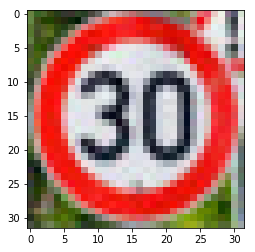

In [201]:
#### Already cropped the images to 32x32 - now load the images
### Load the images and plot them here.
#### Image 1 - 30 KMPH sign
image_path = "sample_traffic_signs/30kmph_32_32.jpg"
image = mpimg.imread(image_path)
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)

In [202]:
#### Predict the 30kmph sign
image_normalized = normalize_image(image)
print("Classified 30kmph sign as -> " , sess.run(tf.argmax(pred, 1), feed_dict={x_unflattened: [image_normalized]}) )

processing image....
Classified 30kmph sign as ->  [1]


In [203]:
#### Print top 5 soft max probabilities for 30kmph sign
sess.run(tf.nn.top_k(tf.nn.softmax(pred), k=5), feed_dict={x_unflattened: [image_normalized]})

TopKV2(values=array([[  1.00000000e+00,   1.19853576e-08,   1.16891972e-08,
          7.62149892e-12,   4.76777515e-12]], dtype=float32), indices=array([[1, 2, 3, 0, 5]], dtype=int32))

### Result -> The top softmax probability is what is the correct classification!

#### 2.] 60 KMPH Sign

This image is: <class 'numpy.ndarray'> with dimensions: (32, 32, 3)


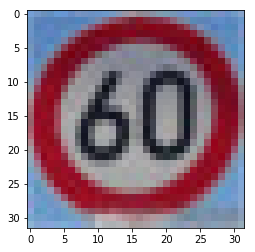

In [204]:
#### Already cropped the images to 32x32 - now load the images
### Load the images and plot them here.
#### Image 2 - 60 KMPH sign
image_path = "sample_traffic_signs/60kmph_32_32.jpg"
image = mpimg.imread(image_path)
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)

In [207]:
#### Predict the 60kmph sign
image_normalized = normalize_image(image)
print("Classified 60kmph sign as -> " , sess.run(tf.argmax(pred, 1), feed_dict={x_unflattened: [image_normalized]}) )

processing image....
Classified 60kmph sign as ->  [1]


In [208]:
#### Print top 5 soft max probabilities for 30kmph sign
sess.run(tf.nn.top_k(tf.nn.softmax(pred), k=5), feed_dict={x_unflattened: [image_normalized]})

TopKV2(values=array([[  9.99996305e-01,   3.63529534e-06,   1.13263027e-07,
          1.06394109e-10,   4.30697492e-11]], dtype=float32), indices=array([[ 1,  3, 42, 38, 32]], dtype=int32))

### Result -> The SECOND softmax probability is what is the correct classification!

#### 3.] 70 KMPH Sign

This image is: <class 'numpy.ndarray'> with dimensions: (32, 32, 3)


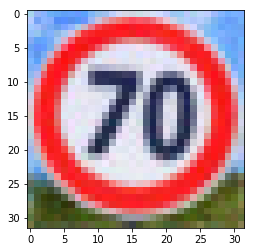

In [209]:
#### Already cropped the images to 32x32 - now load the images
### Load the images and plot them here.
#### Image 3 - 70 KMPH sign
image_path = "sample_traffic_signs/70kmph_32_32.jpg"
image = mpimg.imread(image_path)
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)

In [218]:
#### Predict the 70kmph sign
image_normalized = normalize_image(image)
print("Classified 70kmph sign as -> " , sess.run(tf.argmax(pred, 1), feed_dict={x_unflattened: [image_normalized]}) )

processing image....
Classified 70kmph sign as ->  [1]


In [217]:
#### Print top 5 soft max probabilities for 70kmph sign
sess.run(tf.nn.top_k(tf.nn.softmax(pred), k=5), feed_dict={x_unflattened: [image_normalized]})

TopKV2(values=array([[ 0.84751189,  0.05951448,  0.03579209,  0.02629225,  0.00662028]], dtype=float32), indices=array([[ 1,  4, 35, 33,  5]], dtype=int32))

### Result -> The SECOND BEST softmax probability is what is the correct classification!

#### 4.] Keep Right Sign

This image is: <class 'numpy.ndarray'> with dimensions: (32, 32, 3)


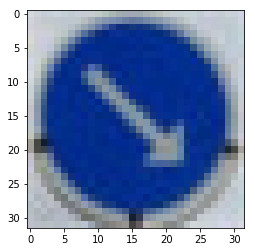

In [222]:
#### Already cropped the images to 32x32 - now load the images
### Load the images and plot them here.
#### Image 4 - Keep Right sign
image_path = "sample_traffic_signs/keep_right_32_32.jpg"
image = mpimg.imread(image_path)
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)

In [223]:
#### Predict the keep right sign
image_normalized = normalize_image(image)
print("Classified keep right sign as -> " , sess.run(tf.argmax(pred, 1), feed_dict={x_unflattened: [image_normalized]}) )

processing image....
Classified keep right sign as ->  [38]


In [224]:
#### Print top 5 soft max probabilities for keep right sign
sess.run(tf.nn.top_k(tf.nn.softmax(pred), k=5), feed_dict={x_unflattened: [image_normalized]})

TopKV2(values=array([[  9.99999046e-01,   9.38198809e-07,   2.96019833e-25,
          1.78253733e-27,   5.09643037e-35]], dtype=float32), indices=array([[38, 34, 36, 35, 40]], dtype=int32))

### Result -> The BEST softmax probability is what is the correct classification!

#### 5.] No Overtaking Sign

This image is: <class 'numpy.ndarray'> with dimensions: (32, 32, 3)


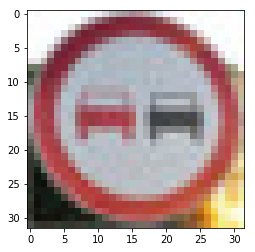

In [219]:
#### Already cropped the images to 32x32 - now load the images
### Load the images and plot them here.
#### Image 4 - Keep Right sign
image_path = "sample_traffic_signs/no_overtaking_32_32.jpg"
image = mpimg.imread(image_path)
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)

In [220]:
#### Predict the keep right sign
image_normalized = normalize_image(image)
print("Classified keep right sign as -> " , sess.run(tf.argmax(pred, 1), feed_dict={x_unflattened: [image_normalized]}) )

processing image....
Classified keep right sign as ->  [9]


In [221]:
#### Print top 5 soft max probabilities for keep right sign
sess.run(tf.nn.top_k(tf.nn.softmax(pred), k=5), feed_dict={x_unflattened: [image_normalized]})

TopKV2(values=array([[  9.99952197e-01,   2.83131194e-05,   1.94355271e-05,
          4.26795665e-12,   3.92378103e-15]], dtype=float32), indices=array([[ 9, 12, 41, 32, 13]], dtype=int32))

### Result -> The BEST softmax probability is what is the correct classification!

### Analyze Performance

# Overall Accuracy was 60%

## The model classified Image 1, 4, 5 were classified correctly!


# Project Writeup

## Please locate this - at the start of this notebook.

